## Seasonality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm

def beta(t, beta_0, beta_1, phi):
    return beta_0 + beta_1*np.cos(np.pi*t/6 + phi)


def IER(t, beta_0, beta_1, phi, mu):
    return 1 - mu/beta(t, beta_0, beta_1, phi)

@np.vectorize
def CER(t, beta_0, beta_1, phi, mu):
    def _inner(s):
        return beta(s, beta_0, beta_1, phi) - mu
    
    def _outer(r):
        return mu*np.exp(-scipy.integrate.quad(_inner, t, r, limit=1000)[0])
    
    return 1/(1+scipy.integrate.quad(_outer, t, np.inf, limit=100)[0])

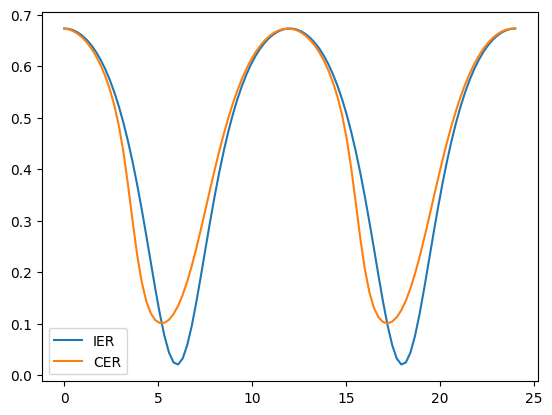

In [2]:
t = np.linspace(0, 24, 100)

N = 10_000
beta_0 = 10
beta_1 = 5
phi = 0
mu = 4.9

fig, ax = plt.subplots()
ax.plot(t, IER(t, beta_0, beta_1, phi, mu), label="IER")
ax.plot(t, CER(t, beta_0, beta_1, phi, mu), label="CER")
ax.legend()

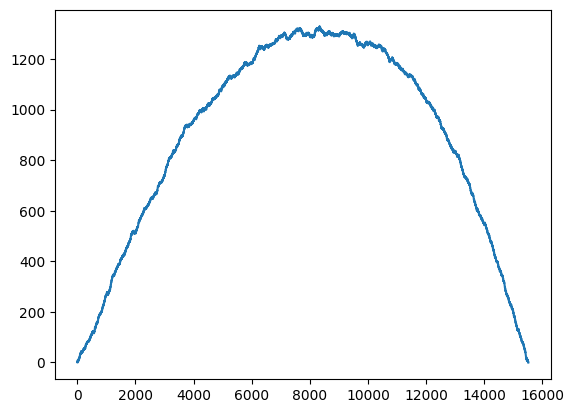

In [4]:
from bp_models.gillespie import direct_gillespie_sir_time_varying_beta

t, I, infected = direct_gillespie_sir_time_varying_beta(0, N, lambda t: beta(t, beta_0, beta_1, phi), mu)

plt.plot(t, I)

In [6]:
t0_sim = np.linspace(0, 24, 10)

simulated = []
num_sims = 1

for t0 in tqdm(t0_sim):
    major_outbreaks = 0
    for _ in range(num_sims):
        _, _, infected = direct_gillespie_sir_time_varying_beta(t0, N, lambda t: beta(t, beta_0, beta_1, phi), mu)
        if infected > 0.2*N:
            major_outbreaks += 1
    simulated.append(major_outbreaks)

fig, ax = plt.subplots()
ax.plot(t, IER(t, beta_0, beta_1, phi, mu), label="IER")
ax.plot(t, CER(t, beta_0, beta_1, phi, mu), label="CER")
ax.plot(t0_sim, simulated)
ax.legend()

  0%|          | 0/10 [00:00<?, ?it/s]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()